In [2]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "MONTHLY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

stock_data = pd.read_csv(datapath + filename, thousands=',')

stock_data = stock_data.iloc[::-1]
print(stock_data)

      timestamp      open      high       low     close      volume
239  2000-06-30  143.6875  149.1562  143.0000  145.2812   127146000
238  2000-07-31  145.4375  151.9843  141.5156  143.0000   106780100
237  2000-08-31  143.6250  153.0937  142.6250  152.3437   102365500
236  2000-09-29  153.2500  153.5937  142.1250  143.6250   113203000
235  2000-10-31  144.2812  145.7500  130.1562  142.9531   178392400
..          ...       ...       ...       ...       ...         ...
4    2020-01-31  323.5400  332.9500  320.3600  321.7300  1389179454
3    2020-02-28  323.3500  339.0800  285.5400  296.2600  2099672006
2    2020-03-31  298.2100  313.8400  218.2600  257.7500  5888710884
1    2020-04-30  247.9800  294.8800  243.9000  290.4800  2798273802
0    2020-05-28  285.3100  306.8400  272.9900  303.0700  1782712301

[240 rows x 6 columns]


In [4]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [5]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
from matplotlib import cm
import datetime as dt
rowNum = 1
timeRow = []
for index, row in stock_data.iterrows():
    timeRow.append(rowNum)
    rowNum += 1
stock_data['timestamp'] = timeRow

X = stock_data[['timestamp']]
y = stock_data['close']
print(stock_data)

     timestamp      open      high       low     close      volume
239          1  143.6875  149.1562  143.0000  145.2812   127146000
238          2  145.4375  151.9843  141.5156  143.0000   106780100
237          3  143.6250  153.0937  142.6250  152.3437   102365500
236          4  153.2500  153.5937  142.1250  143.6250   113203000
235          5  144.2812  145.7500  130.1562  142.9531   178392400
..         ...       ...       ...       ...       ...         ...
4          236  323.5400  332.9500  320.3600  321.7300  1389179454
3          237  323.3500  339.0800  285.5400  296.2600  2099672006
2          238  298.2100  313.8400  218.2600  257.7500  5888710884
1          239  247.9800  294.8800  243.9000  290.4800  2798273802
0          240  285.3100  306.8400  272.9900  303.0700  1782712301

[240 rows x 6 columns]


# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

linear model coeff (w): [0.74736092]
linear model intercept (b): 72.359
R-squared score (training): 0.736
R-squared score (test): 0.651
RMSE: 37.964


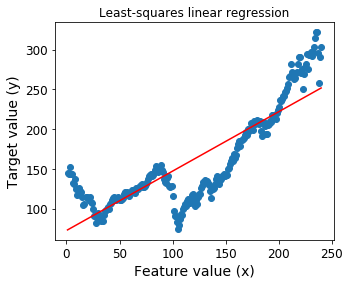

In [8]:
from sklearn import metrics

print('linear model coeff (w): {}'.format(linreg.coef_))

print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))


# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


plt.figure(figsize=(5,4))
plt.scatter(X, y)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y, cv=3)

array([-32.43047891,  -5.27997638,  -5.57840794])

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt


linreg = LinearRegression().fit(X_train, y_train)

print('LINEAR REGRESSION')
print('linear model coeff (w):\n{}'
    .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
print(' RMSE score (train): {:.3f}'
     .format(sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
print('RMSE score (test): {:.3f}\n'
     .format(sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

LINEAR REGRESSION
linear model coeff (w):
[0.74736092]
linear model intercept (b): 72.359
R-squared score (training): 0.736
R-squared score (test): 0.651
 RMSE score (train): 31.377
RMSE score (test): 37.964



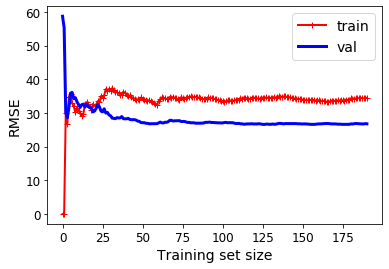

In [11]:
plot_learning_curves(linreg,  X,y)

# Linear Regression with Gradient Descent

In [12]:
X_b = np.c_[np.ones((240, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[69.95855868  0.7554259 ]


In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([69.95855868, 71.46941047])

In [14]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[0.03338246 0.08536784]


array([-3.24351020e+37, -5.20036115e+39])

In [15]:
X_b.dot(theta)

array([-5.23279625e+39, -1.04331574e+40, -1.56335186e+40, -2.08338797e+40,
       -2.60342409e+40, -3.12346020e+40, -3.64349632e+40, -4.16353243e+40,
       -4.68356855e+40, -5.20360466e+40, -5.72364078e+40, -6.24367689e+40,
       -6.76371301e+40, -7.28374912e+40, -7.80378524e+40, -8.32382135e+40,
       -8.84385747e+40, -9.36389358e+40, -9.88392970e+40, -1.04039658e+41,
       -1.09240019e+41, -1.14440380e+41, -1.19640742e+41, -1.24841103e+41,
       -1.30041464e+41, -1.35241825e+41, -1.40442186e+41, -1.45642547e+41,
       -1.50842909e+41, -1.56043270e+41, -1.61243631e+41, -1.66443992e+41,
       -1.71644353e+41, -1.76844714e+41, -1.82045075e+41, -1.87245437e+41,
       -1.92445798e+41, -1.97646159e+41, -2.02846520e+41, -2.08046881e+41,
       -2.13247242e+41, -2.18447604e+41, -2.23647965e+41, -2.28848326e+41,
       -2.34048687e+41, -2.39249048e+41, -2.44449409e+41, -2.49649770e+41,
       -2.54850132e+41, -2.60050493e+41, -2.65250854e+41, -2.70451215e+41,
       -2.75651576e+41, -

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [17]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "gradientDescent"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  
/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  
/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


Saving figure gradient_descent_plot


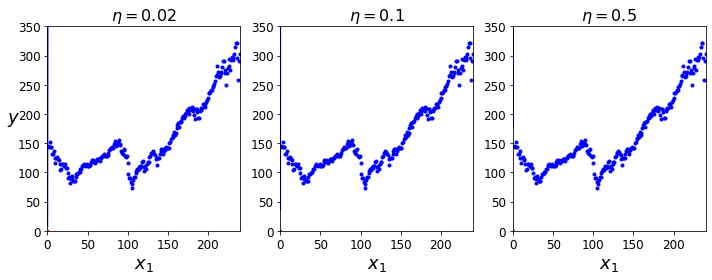

In [18]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Regularized Linear Regression

## Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=25.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 72.36189813698965
ridge regression linear model coeff:
[0.74733982]
R-squared score (training): 0.736
R-squared score (test): 0.651
Number of non-zero features: 1


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 73.10672764658696
ridge regression linear model coeff:
[177.87189896]
R-squared score (training): 0.736
R-squared score (test): 0.651
Number of non-zero features: 1


/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


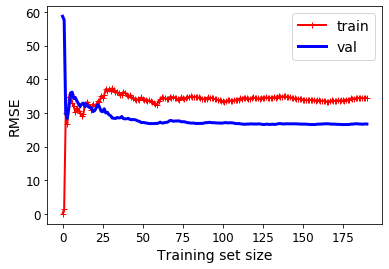

In [25]:
plot_learning_curves(linlasso,X,y)

In [21]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.74, r-squared test: 0.65

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.73, r-squared test: 0.65

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.62, r-squared test: 0.54

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.50, r-squared test: 0.43

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.31, r-squared test: 0.26

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.19, r-squared test: 0.15

Alpha = 1000.00
num abs(coeff) > 1.0: 1, r-squared training: 0.02, r-squared test: 0.01



## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=1, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 78.8627052830337
lasso regression linear model coeff:
[166.35833114]
Non-zero features: 1
R-squared score (training): 0.733
R-squared score (test): 0.645

Features with non-zero weight (sorted by absolute magnitude):
	timestamp, 166.358


/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


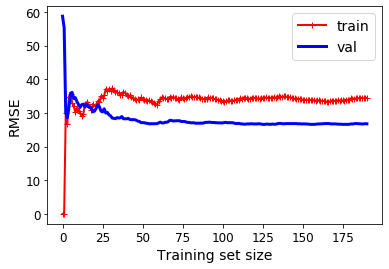

In [23]:
plot_learning_curves(linlasso,X,y)

In [24]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.74, r-squared test: 0.65

Alpha = 1.00
Features kept: 1, r-squared training: 0.73, r-squared test: 0.65

Alpha = 2.00
Features kept: 1, r-squared training: 0.72, r-squared test: 0.63

Alpha = 3.00
Features kept: 1, r-squared training: 0.71, r-squared test: 0.62

Alpha = 5.00
Features kept: 1, r-squared training: 0.66, r-squared test: 0.57

Alpha = 10.00
Features kept: 1, r-squared training: 0.43, r-squared test: 0.36

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



# Polynomial Regression

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
    
X = stock_data[['timestamp']]
y = stock_data['close']

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

POLYNOMIAL DEGREE-2 W/ LINEAR REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.         -0.75662664  0.00626281]
(poly deg 2) linear model intercept (b): 131.842
(poly deg 2) R-squared score (training): 0.919
(poly deg 2) R-squared score (test): 0.920
(poly deg 2) RMSE score (train): 17.406
(poly deg 2) RMSE score (test): 18.047

POLYNOMIAL DEGREE-3 W/ LINEAR REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -3.89177610e-01  2.44153410e-03  1.06415777e-05]
(poly deg 3) linear model intercept (b): 124.330
(poly deg 3) R-squared score (training): 0.921
(poly deg 3) R-squared score (test): 0.923
(poly deg 3) RMSE score (train): 17.187
(poly deg 3) RMSE score (test): 17.733

POLYNOMIAL DEGREE-5 W/ LINEAR REGRESSION
(poly deg 5) linear model coeff (w):
[ 0.00000000e+00 -3.77036592e+00  1.05949449e-01 -1.17907746e-03
  5.71509971e-06 -9.70460130e-09]
(poly deg 5) linear model intercept (b): 149.710
(poly deg 5) R-squared score (training): 0.945
(poly deg 5) R-squared score 

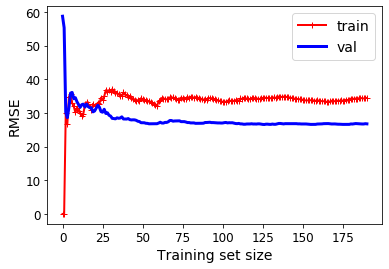

In [86]:
for degree in [2, 3, 5,10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ LINEAR REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)


POLYNOMIAL DEGREE-2 W/ RIDGE REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.         -0.75661183  0.00626275]
(poly deg 2) linear model intercept (b): 131.841
(poly deg 2) R-squared score (training): 0.919
(poly deg 2) R-squared score (test): 0.920
(poly deg 2) RMSE score (train): 17.406
(poly deg 2) RMSE score (test): 18.047

POLYNOMIAL DEGREE-3 W/ RIDGE REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -3.89131472e-01  2.44110359e-03  1.06426934e-05]
(poly deg 3) linear model intercept (b): 124.329
(poly deg 3) R-squared score (training): 0.921
(poly deg 3) R-squared score (test): 0.923
(poly deg 3) RMSE score (train): 17.187
(poly deg 3) RMSE score (test): 17.733

POLYNOMIAL DEGREE-5 W/ RIDGE REGRESSION
(poly deg 5) linear model coeff (w):
[ 0.00000000e+00 -3.76513646e+00  1.05818535e-01 -1.17776631e-03
  5.70940494e-06 -9.69565154e-09]
(poly deg 5) linear model intercept (b): 149.655
(poly deg 5) R-squared score (training): 0.945
(poly deg 5) R-squared score (te

C:\Users\aboss\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41122e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\aboss\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.71451e-49): result may not be accurate.
  overwrite_a=True).T


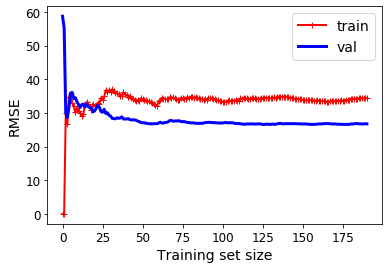

In [87]:
for degree in [2, 3, 5, 10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = Ridge().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ RIDGE REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)